<a href="https://colab.research.google.com/github/BimsaraS99/tennis-analyzer/blob/main/yolov8_training_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This script can be used for train the each model.

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.0/800.0 kB 8.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gXZGpuV08atKv8wCInWw")
project = rf.workspace("new-workspace-em6aw").project("tennis-ball-and-court-detection")
version = project.version(2)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.52, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Tennis-Ball-and-Court-Detection-2 in yolov8:: 100%|██████████| 12192/12192 [00:02<00:00, 4766.48it/s]


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.52 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.7/78.2 GB disk)


In [4]:
train_path_img = "/content/Tennis-Ball-and-Court-Detection-2/train/images"
train_path_label = "/content/Tennis-Ball-and-Court-Detection-2/train/labels"
val_path_img = "/content/Tennis-Ball-and-Court-Detection-2/valid/images"
val_path_label = "/content/Tennis-Ball-and-Court-Detection-2/valid/labels"

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data='/content/Tennis-Ball-and-Court-Detection-2/data.yaml' epochs=10 batch=8 project='/content/Results'

100% 49.7M/49.7M [00:00<00:00, 199MB/s]
Ultralytics YOLOv8.2.52 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Tennis-Ball-and-Court-Detection-2/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/Results, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fa

In [11]:
from ultralytics import YOLO

model = YOLO('/content/Results/train/weights/best.pt')

results = model.predict(source='/content/non.png', save=True)


image 1/1 /content/non.png: 320x640 1 ball, 2 courts, 1 net, 3 players, 86.9ms
Speed: 3.4ms preprocess, 86.9ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict3


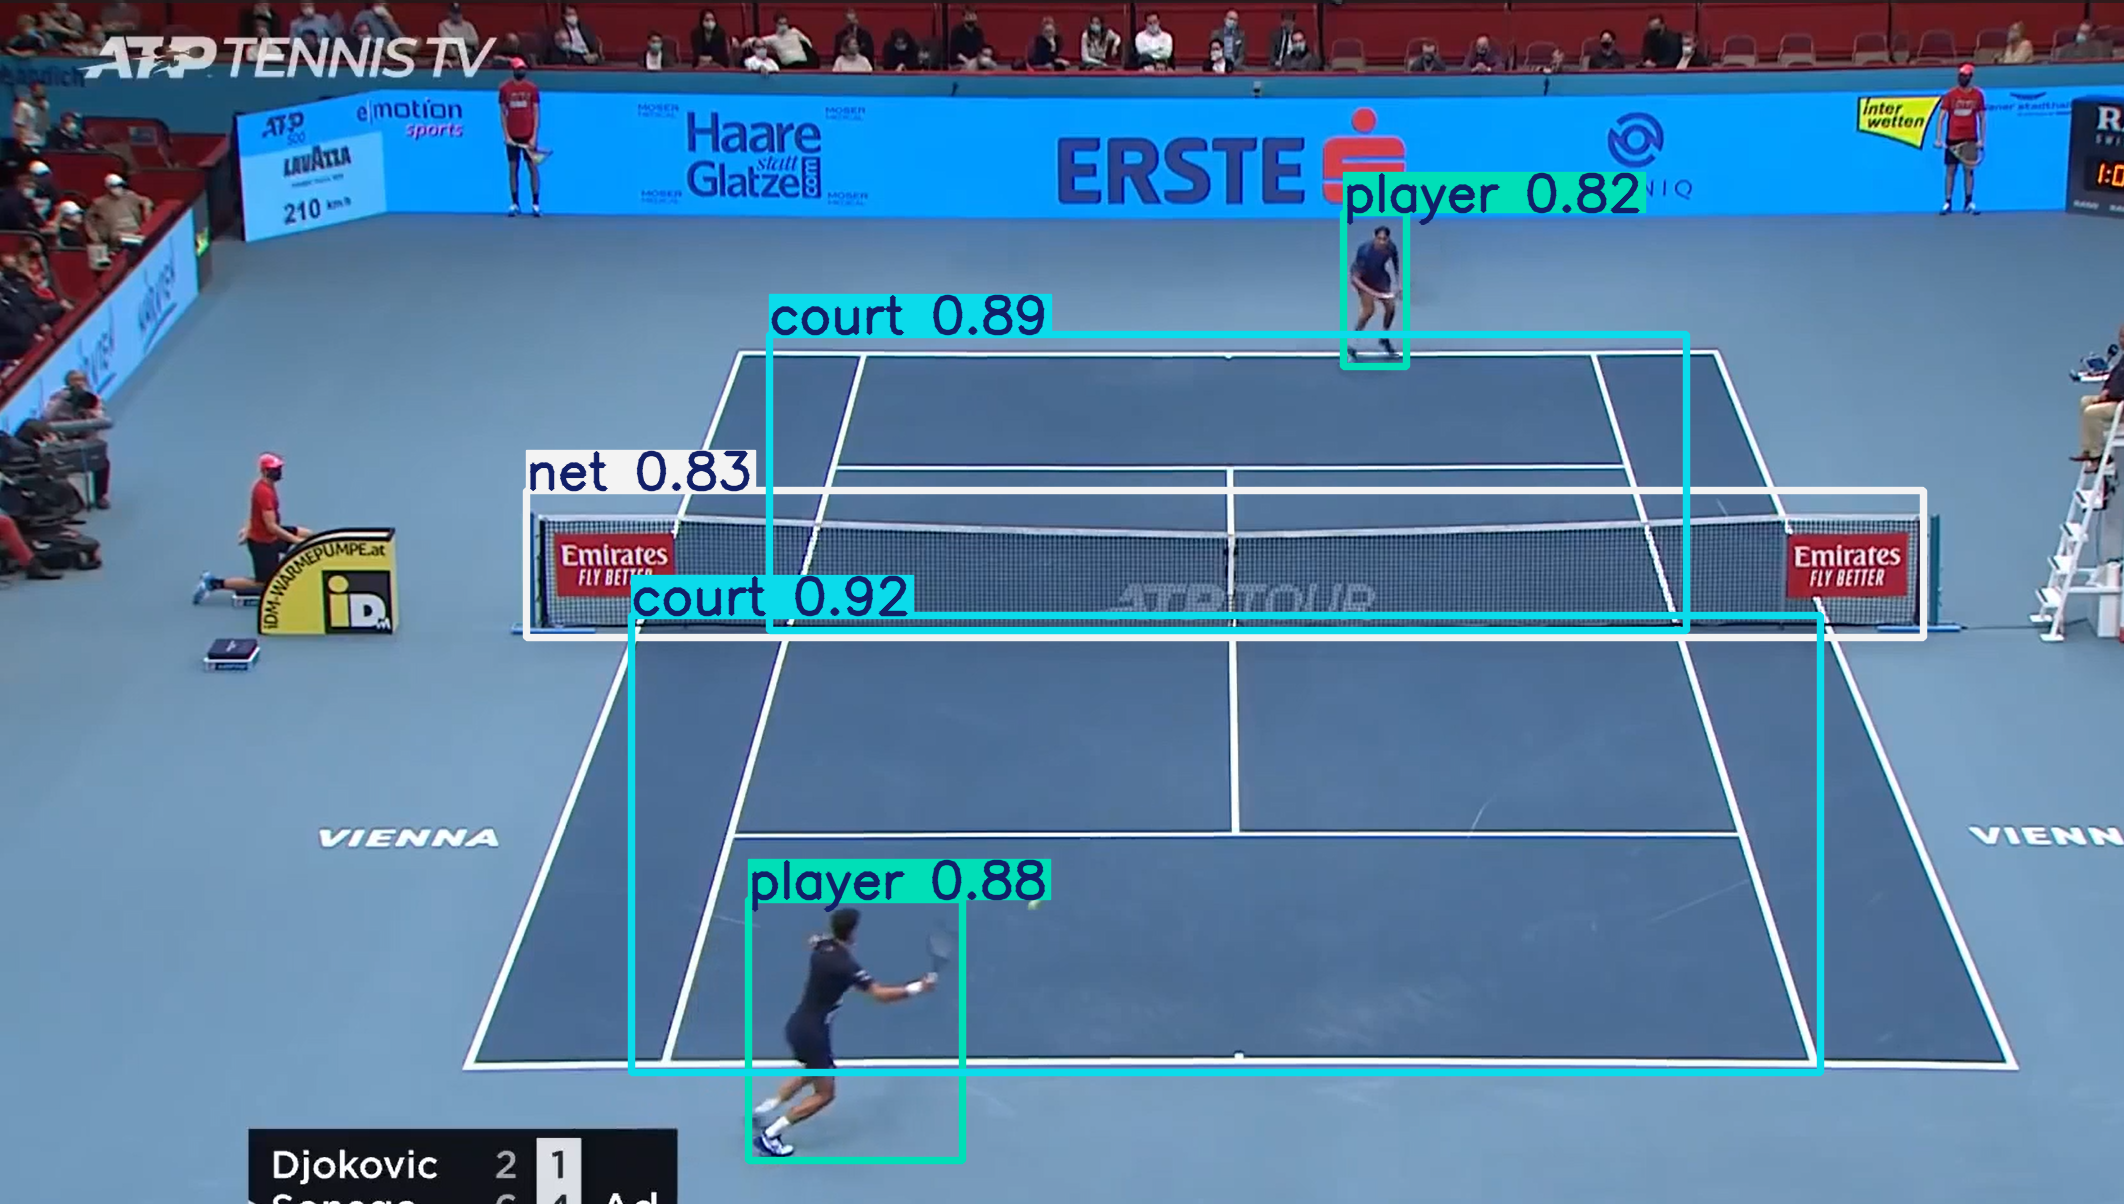

In [10]:
from IPython.display import Image

Image(filename='/content/runs/detect/predict/4.png', width=1280)
